In [97]:
import os, zipfile, re
import requests
import pandas as pd
from datetime import datetime

In [98]:
path = %pwd
os.chdir(path)

In [99]:
main_path = 'hist'
if os.path.exists(main_path):
    os.chdir(main_path)
else:
    os.mkdir(main_path)
    print('Criando a pasta de trabalho: /hist')

Criando a pasta de trabalho: /hist


In [100]:
intervalo = range(2000, 2024)
colunas = ['Data', 'BDI', 'CodNeg', 'TipoMercado', 'NomeResumido', 'Especificacao', 'Abertura', 'Maximo', 'Minimo', 'Ultimo', 'Volume']
df = pd.DataFrame(columns=colunas)

In [107]:
# Função para converter o formato de moeda para float

def prepareToFloat(value):
    value = value.strip()
    return value[:-2] + '.' + value[-2:]

## Só execute caso não haja arquivos .csv na pasta de Cotações Históricas

In [5]:
url = 'https://bvmf.bmfbovespa.com.br/InstDados/SerHist/COTAHIST_A'

for ano in range(2000, 2024):
    localUrl = f'{url}{ano}.ZIP'
    fileName = f'COTAHIST_A{ano}.ZIP'

    if not os.path.exists(fileName):
        print(localUrl)
        r = requests.get(localUrl, allow_redirects=True)
    
        with open(fileName, 'wb') as zipFile:
            zipFile.write(r.content)
            zipFile.close()

    try:
        zip_ref = zipfile.ZipFile(os.path.abspath(fileName))
        zip_ref.extractall() # extract file to dir
        zip_ref.close() # close file
    except:
        print (f'Não foi possível descompactar o arquivo {fileName}')

    os.remove(fileName) # delete zipped file

https://bvmf.bmfbovespa.com.br/InstDados/SerHist/COTAHIST_A2000.ZIP
https://bvmf.bmfbovespa.com.br/InstDados/SerHist/COTAHIST_A2001.ZIP
https://bvmf.bmfbovespa.com.br/InstDados/SerHist/COTAHIST_A2002.ZIP
https://bvmf.bmfbovespa.com.br/InstDados/SerHist/COTAHIST_A2003.ZIP


KeyboardInterrupt: 

In [ ]:
# Correção dos formatos dos nomes de arquivos
for name in os.listdir():
    match = re.match(r'^COTAHIST.A(\d{4}).*$', name)
    if match:
        newName = f'COTAHIST_A{match.group(1)}.txt'
        os.rename(name, newName)
        print (newName)

COTAHIST_A2015.txt
COTAHIST_A2014.txt
COTAHIST_A2016.txt
COTAHIST_A2002.txt
COTAHIST_A2003.txt
COTAHIST_A2017.txt
COTAHIST_A2013.txt
COTAHIST_A2007.txt
COTAHIST_A2006.txt
COTAHIST_A2012.txt
COTAHIST_A2004.txt
COTAHIST_A2010.txt
COTAHIST_A2011.txt
COTAHIST_A2005.txt
COTAHIST_A2001.txt
COTAHIST_A2008.txt
COTAHIST_A2020.txt
COTAHIST_A2021.txt
COTAHIST_A2009.txt
COTAHIST_A2023.txt
COTAHIST_A2022.txt
COTAHIST_A2019.txt
COTAHIST_A2000.txt
COTAHIST_A2018.txt


In [38]:
# Mapeamento dos dados para .csv

for name in os.listdir():
    if not os.path.isdir(name) and not name.endswith('.csv') :
        print(name)
        try:
            with open(name, 'r') as arq:    
                linhas = arq.readlines()
                with open(name[:-4] + '.csv', 'w') as csv:
                    strCol = ''
                    for col in colunas:
                        strCol += f'{col};'
                    csv.write(f'{strCol[:-1]}\n')

                    for linha in linhas[1:len(linhas[:-1])]:               
                        csv.write(linha[2:10].strip()) # Data
                        csv.write(';')
                        csv.write(linha[10:12].strip()) # BDI
                        csv.write(';')
                        csv.write(linha[12:24].strip()) # Codigo Negociacao
                        csv.write(';')
                        csv.write(linha[24:27].strip()) # Tipo de Mercado
                        csv.write(';')
                        csv.write(linha[27:39].strip()) # Nome Resumido
                        csv.write(';')
                        csv.write(linha[39:49].strip()) # Especificacao do Papel
                        csv.write(';')
                        csv.write(prepareToFloat(linha[56:69])) # Abertura
                        csv.write(';')
                        csv.write(prepareToFloat(linha[69:82])) # Maximo
                        csv.write(';')
                        csv.write(prepareToFloat(linha[82:95])) # Minimo
                        csv.write(';')
                        csv.write(prepareToFloat(linha[108:121])) # Ultimo
                        csv.write(';')
                        csv.write(linha[170:188]) # Volume
                        csv.write('\n')
        except:
            print(f'Não foi possível abrir o arquivo {name}')

        os.remove(name)   
    



## Pode executar sempre

In [108]:
for ano in intervalo:
    try:
        df = pd.concat([df, pd.read_csv(f'COTAHIST_A{ano}.csv', sep=';')], ignore_index=True)
        print(f'Ano {ano} OK')
    except Exception as err:
        print(err)
        print(f'Não foi possivel carregar {ano}')

[Errno 2] No such file or directory: 'COTAHIST_A2000.csv'
Não foi possivel carregar 2000
[Errno 2] No such file or directory: 'COTAHIST_A2001.csv'
Não foi possivel carregar 2001
[Errno 2] No such file or directory: 'COTAHIST_A2002.csv'
Não foi possivel carregar 2002
[Errno 2] No such file or directory: 'COTAHIST_A2003.csv'
Não foi possivel carregar 2003
[Errno 2] No such file or directory: 'COTAHIST_A2004.csv'
Não foi possivel carregar 2004
[Errno 2] No such file or directory: 'COTAHIST_A2005.csv'
Não foi possivel carregar 2005
[Errno 2] No such file or directory: 'COTAHIST_A2006.csv'
Não foi possivel carregar 2006
[Errno 2] No such file or directory: 'COTAHIST_A2007.csv'
Não foi possivel carregar 2007
[Errno 2] No such file or directory: 'COTAHIST_A2008.csv'
Não foi possivel carregar 2008
[Errno 2] No such file or directory: 'COTAHIST_A2009.csv'
Não foi possivel carregar 2009
[Errno 2] No such file or directory: 'COTAHIST_A2010.csv'
Não foi possivel carregar 2010
[Errno 2] No such fil

Separar as ações mais rentaveis de 2023

In [103]:
df['Data'] = pd.to_datetime(df['Data'], format='%Y%m%d')
df2023 = df[df['Data'].dt.year >= 2023]
df2023

,Data,BDI,CodNeg,TipoMercado,NomeResumido,Especificacao,Abertura,Maximo,Minimo,Ultimo,Volume


In [104]:
codigos = df.CodNeg.value_counts()[:10]
codigos

Series([], Name: CodNeg, dtype: int64)

In [105]:
codigos.index[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
dfDiff = []

for i in range(len(codigos)):
    df_cod = df[df['CodNeg'] == codigos.index[i]][['Abertura', 'Ultimo']].copy()
    dfDiff.append({'codNeg': codigos.index[i], 'diff': df_cod['Ultimo'].max() - df_cod['Abertura'].min()})

dfDiff

[{'codNeg': 'PETR4T', 'diff': 132.38},
 {'codNeg': 'VALE5T', 'diff': 160.89},
 {'codNeg': 'USIM5T', 'diff': 145.9},
 {'codNeg': 'BBAS3T', 'diff': 79.42999999999999},
 {'codNeg': 'BBDC4T', 'diff': 197.26000000000002},
 {'codNeg': 'CSNA3T', 'diff': 208.14},
 {'codNeg': 'GGBR4T', 'diff': 86.43},
 {'codNeg': 'ITSA4T', 'diff': 50.519999999999996},
 {'codNeg': 'VALE3T', 'diff': 173.04},
 {'codNeg': 'BRKM5T', 'diff': 831.0100000000001}]

## BRKM5T (BRASKEM)

In [ ]:
dfBraskem = df[df.CodNeg == 'BRKM5T']

Calcular os retornos diários para cada ação.

Isso pode ser feito usando a fórmula (preço atual - preço anterior) / preço anterior.

In [ ]:
dfBraskem["Retorno"] = dfBraskem['Ultimo'].pct_change()

/var/folders/mq/07ht7frx6vn8rjnw4vfpptvr0000gp/T/ipykernel_33720/2318669226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfBraskem["Retorno"] = dfBraskem['Ultimo'].pct_change()


Calcular o retorno acumulado para cada ação ao longo do tempo.

Isso pode ser feito somando os retornos diários cumulativamente.

In [ ]:
dfBraskem["Retorno Cumulativo"] = (1 + dfBraskem["Retorno"]).cumprod()
dfBraskem


/var/folders/mq/07ht7frx6vn8rjnw4vfpptvr0000gp/T/ipykernel_33720/26031330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfBraskem["Retorno Cumulativo"] = (1 + dfBraskem["Retorno"]).cumprod()


,Data,BDI,CodNeg,TipoMercado,NomeResumido,Especificacao,Abertura,Maximo,Minimo,Ultimo,Volume,Retorno,Retorno Cumulativo
391119,2002-12-19,62,BRKM5T,30,BRKM,PNA*,221.34,221.35,221.34,221.35,21470788,NaN,NaN
391120,2002-10-24,62,BRKM5T,30,BRKM,PNA*,217.63,217.63,217.62,217.62,8704876,-0.016851,0.983149
391121,2002-09-03,62,BRKM5T,30,BRKM,PNA*,297.16,297.17,297.16,297.17,1485847,0.365545,1.342534
391122,2002-09-04,62,BRKM5T,30,BRKM,PNA*,290.71,290.72,284.06,284.06,7168371,-0.044116,1.283307
391123,2002-09-05,62,BRKM5T,30,BRKM,PNA*,279.86,279.87,279.86,279.87,1399320,-0.014750,1.264378
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11899489,2023-06-15,62,BRKM5T,30,BRASKEM,PNA N1,29.01,29.99,28.61,29.99,2346266,0.015921,0.135487
11899490,2023-06-15,62,BRKM5T,30,BRASKEM,PNA N1,30.15,30.21,28.80,30.21,7408553,0.007336,0.136481
11910721,2023-06-16,62,BRKM5T,30,BRASKEM,PNA N1,30.43,30.65,29.48,29.49,60791932,-0.023833,0.133228
11910722,2023-06-16,62,BRKM5T,30,BRASKEM,PNA N1,30.30,30.31,30.30,30.31,2727806,0.027806,0.136932


In [ ]:
dfBraskem = dfBraskem[['Data', 'CodNeg', 'Abertura', 'Minimo', 'Maximo', 'Ultimo', 'Volume']].copy()

## Definição do ativo a ser verificado

- BRKM5T - Braskem
- NEWU11
- BBVH12
- HBRH11
- PETR4
- LMTB34

In [ ]:
def preparaAtivo(df_ativo):
    df_ativo['Amanha'] = df_ativo['Ultimo'].shift(-1)
    df_ativo['Alvo'] = (df_ativo['Amanha'] > df_ativo['Ultimo']).astype(int)
    return df_ativo


In [ ]:
dfBraskem = preparaAtivo(dfBraskem)
dfBraskem

,Data,CodNeg,Abertura,Minimo,Maximo,Ultimo,Volume,Amanha,Alvo
391119,2002-12-19,BRKM5T,221.34,221.34,221.35,221.35,21470788,217.62,0
391120,2002-10-24,BRKM5T,217.63,217.62,217.63,217.62,8704876,297.17,1
391121,2002-09-03,BRKM5T,297.16,297.16,297.17,297.17,1485847,284.06,0
391122,2002-09-04,BRKM5T,290.71,284.06,290.72,284.06,7168371,279.87,0
391123,2002-09-05,BRKM5T,279.86,279.86,279.87,279.87,1399320,271.81,0
...,...,...,...,...,...,...,...,...,...
11899489,2023-06-15,BRKM5T,29.01,28.61,29.99,29.99,2346266,30.21,1
11899490,2023-06-15,BRKM5T,30.15,28.80,30.21,30.21,7408553,29.49,0
11910721,2023-06-16,BRKM5T,30.43,29.48,30.65,29.49,60791932,30.31,1
11910722,2023-06-16,BRKM5T,30.30,30.30,30.31,30.31,2727806,31.05,1


## Contrução do Modelo de Predição

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = dfBraskem.iloc[:-100]
test = dfBraskem.iloc[-100:]

predictors = ['Ultimo', 'Volume', 'Abertura', 'Maximo', 'Minimo']
model.fit(train[predictors], train['Alvo'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [ ]:
preds = pd.Series(preds, index=test.index)

In [ ]:
preds

11657897    1
11657898    0
11657899    1
11657900    1
11657901    1
           ..
11899489    1
11899490    1
11910721    1
11910722    0
11910723    1
Length: 100, dtype: int64

In [ ]:
precision_score(test['Alvo'], preds)

0.6615384615384615

In [ ]:
combined = pd.concat([test['Alvo'], preds], axis=1)

<AxesSubplot: >

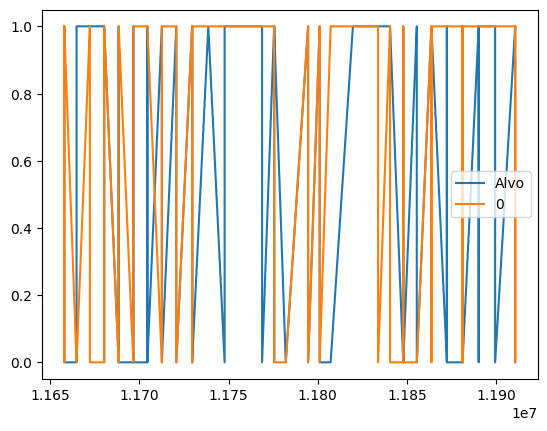

In [ ]:
combined.plot()

## Backtesting

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Alvo'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Alvo'], preds], axis=1)
    return combined

In [ ]:
def backtest(data, model, predictors, start=100, step=10):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [ ]:
dfBraskem.shape[0]

13062

In [ ]:
predictions = backtest(dfBraskem, model, predictors)

In [ ]:
predictions['Predictions'].value_counts()

1    9967
0    2995
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions['Alvo'], predictions['Predictions'])

0.5844286144276111

In [ ]:
predictions["Alvo"].value_counts() / predictions.shape[0]

1    0.565345
0    0.434655
Name: Alvo, dtype: float64

## Adicionando mais preditores ao modelo

In [ ]:
horizons = [2, 5, 60, 250, 1000]
new_predictors  = []

for horizon in horizons:
    rolling_averages = dfBraskem.rolling(horizon).mean()

    ratio_column = f"Taxa_Ultimo_{horizon}"

    dfBraskem[ratio_column] = dfBraskem['Ultimo'] / rolling_averages['Ultimo']

    trend_column = f'Trend_{horizon}'
    dfBraskem[trend_column] = dfBraskem.shift(1).rolling(horizon).sum()['Alvo']

    new_predictors += [ratio_column, trend_column]

/var/folders/mq/07ht7frx6vn8rjnw4vfpptvr0000gp/T/ipykernel_33720/2467511920.py:5: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['CodNeg', 'Data'], dtype='object')
  rolling_averages = dfBraskem.rolling(horizon).mean()
/var/folders/mq/07ht7frx6vn8rjnw4vfpptvr0000gp/T/ipykernel_33720/2467511920.py:12: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['CodNeg', 'Data'], dtype='object')
  dfBraskem[trend_column] = dfBraskem.shift(1).rolling(horizon).sum()['Alvo']
/var/folders/mq/07ht7frx6vn8rjnw4vfpptvr0000gp/T/ipykernel_33720/2467511920.py:5: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError

In [ ]:
dfBraskem

,Data,CodNeg,Abertura,Minimo,Maximo,Ultimo,Volume,Amanha,Alvo,Taxa_Ultima_2,Trend_2,Taxa_Ultima_5,Trend_5,Taxa_Ultima_60,Trend_60,Taxa_Ultima_250,Trend_250,Taxa_Ultima_1000,Trend_1000
391119,2002-12-19,BRKM5T,221.34,221.34,221.35,221.35,21470788,217.62,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391120,2002-10-24,BRKM5T,217.63,217.62,217.63,217.62,8704876,297.17,1,0.991503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391121,2002-09-03,BRKM5T,297.16,297.16,297.17,297.17,1485847,284.06,0,1.154529,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391122,2002-09-04,BRKM5T,290.71,284.06,290.72,284.06,7168371,279.87,0,0.977444,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391123,2002-09-05,BRKM5T,279.86,279.86,279.87,279.87,1399320,271.81,0,0.992570,0.0,1.076365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11899489,2023-06-15,BRKM5T,29.01,28.61,29.99,29.99,2346266,30.21,1,1.007898,2.0,1.039731,4.0,1.171713,39.0,1.361387,156.0,0.881054,500.0
11899490,2023-06-15,BRKM5T,30.15,28.80,30.21,30.21,7408553,29.49,0,1.003654,2.0,1.032256,4.0,1.175410,40.0,1.369713,156.0,0.888249,500.0
11910721,2023-06-16,BRKM5T,30.43,29.48,30.65,29.49,60791932,30.31,1,0.987940,1.0,0.996890,4.0,1.143792,39.0,1.335583,156.0,0.867675,500.0
11910722,2023-06-16,BRKM5T,30.30,30.30,30.31,30.31,2727806,31.05,1,1.013712,1.0,1.013577,4.0,1.170300,40.0,1.370618,157.0,0.892460,500.0
